# Car Price Prediction
Problem Statement
With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase-

Data Collection Phase I have done web scraping to collect the data of used cars from the well known website www.cardekho.com and fetched data for different locations. As per the requirement of our client we need to build the model to predict the prices of these used cars.

Model Building Phase After collecting the data, I need to build a machine learning model. Before model building we need to do all data pre-processing steps. 

In [27]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_excel("Used_cars_data.xlsx",index_col=0)
df

Car_Name Fuel_type Running_in_kms Endine_disp  \
0           2017 Volkswagen Vento    Petrol     43,688 kms       1197    
1              2015 Hyundai Verna    Petrol     79,290 kms       1591    
2           2017 Volkswagen Vento    Petrol     49,612 kms       1197    
3               2019 Jeep Compass    Petrol     32,294 kms       1368    
4          2016 Hyundai Grand i10    Petrol     59,313 kms       1197    
...                           ...       ...            ...         ...   
5174                  2020 BMW X7    Petrol   1,80,000 kms        2998   
5175           2021 Jeep Wrangler    Petrol     10,000 kms        1998   
5176             2017 Hyundai EON    Petrol     85,416 kms         814   
5177             2011 Hyundai i10    Petrol   1,11,408 kms        1086   
5178  2021 Mercedes-Benz AMG C 43    Petrol      1,500 kms        2996   

     Gear_transmission Milage_in_km/ltr Seating_cap           color Max_power  \
0            Automatic       18.19 kmpl           5  Titanium Beige     103.2   
1               Manual       17.01 kmpl           5      Pure white     121.4   
2            Automatic       18.19 kmpl           5    Carbon Steel     103.2   
3            Automatic          16 kmpl           5            Grey    160.77   
4            Automatic        18.9 kmpl           5        Wine Red        82   
...                ...              ...         ...             ...       ...   
5174         Automatic       10.54 kmpl           7            Grey    335.25   
5175         Automatic        12.1 kmpl           5           Black       268   
5176            Manual        21.1 kmpl           5       Star Dust      55.2   
5177            Manual       19.81 kmpl           5            Grey     68.05   
5178         Automatic                -           5           Black    384.87   

     front_brake_type  rear_brake_type cargo_volume height width length  \
0     Ventilated Disc             Drum          494   1467  1699   4390   
1                Disc             Drum   465-litres   1475  1700   4375   
2     Ventilated Disc             Drum          494   1467  1699   4390   
3                Disc            Discs   408-litres   1640  1818   4395   
4                Disc             Drum   256-liters   1520  1660   3765   
...               ...              ...          ...    ...   ...    ...   
5174             Disc             Disc            -   1805  2218   5150   
5175  Ventilated Disc  Ventilated Disc            -   1838  1894   4882   
5176             Disc             Drum   215-litres   1500  1550   3495   
5177  Ventilated Disc             Drum   225-litres   1550  1595   3585   
5178  Ventilated Disc  Ventilated Disc            -   1402  2016   4693   

     Weight Insp_score    top_speed  \
0      1720          9     185 Kmph   
1         -          9     196 Kmph   
2      1720        9.5     185 Kmph   
3         -        9.5  186.69 kmph   
4         -          9     163 Kmph   
...     ...        ...          ...   
5174      -          -          245   
5175      -          -            -   
5176      -          -     135 Kmph   
5177      -          -     165 Kmph   
5178      -          -      250km/h   

                                             City_url   Car_price  
0     https://www.cardekho.com/used-cars+in+ahmedabad   7.58 Lakh  
1     https://www.cardekho.com/used-cars+in+ahmedabad   5.88 Lakh  
2     https://www.cardekho.com/used-cars+in+ahmedabad   7.53 Lakh  
3     https://www.cardekho.com/used-cars+in+ahmedabad  16.78 Lakh  
4     https://www.cardekho.com/used-cars+in+ahmedabad   5.63 Lakh  
...                                               ...         ...  
5174    https://www.cardekho.com/used-cars+in+lucknow     1.23 Cr  
5175    https://www.cardekho.com/used-cars+in+lucknow  61.95 Lakh  
5176    https://www.cardekho.com/used-cars+in+lucknow   2.72 Lakh  
5177    https://www.cardekho.com/used-cars+in+lucknow   1.80 Lakh  
5178    https://www.cardekho.com/used-cars+in

# Preprocessing and Exploratory Data Analysis

In [29]:
# Checking 
df.shape

(5179, 20)

There are 5179 rows and 20 columns in the dataframe

In [30]:
# Checking all column names
df.columns

Index(['Car_Name', 'Fuel_type', 'Running_in_kms', 'Endine_disp',
       'Gear_transmission', 'Milage_in_km/ltr', 'Seating_cap', 'color',
       'Max_power', 'front_brake_type', 'rear_brake_type', 'cargo_volume',
       'height', 'width', 'length', 'Weight', 'Insp_score', 'top_speed',
       'City_url', 'Car_price'],
      dtype='object')

In [31]:
df.dtypes

Car_Name             object
Fuel_type            object
Running_in_kms       object
Endine_disp          object
Gear_transmission    object
Milage_in_km/ltr     object
Seating_cap          object
color                object
Max_power            object
front_brake_type     object
rear_brake_type      object
cargo_volume         object
height               object
width                object
length               object
Weight               object
Insp_score           object
top_speed            object
City_url             object
Car_price            object
dtype: object

In [32]:
df['Car_price']

0        7.58 Lakh
1        5.88 Lakh
2        7.53 Lakh
3       16.78 Lakh
4        5.63 Lakh
           ...    
5174       1.23 Cr
5175    61.95 Lakh
5176     2.72 Lakh
5177     1.80 Lakh
5178    79.00 Lakh
Name: Car_price, Length: 5179, dtype: object

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5179 entries, 0 to 5178
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_Name           5179 non-null   object
 1   Fuel_type          5179 non-null   object
 2   Running_in_kms     5179 non-null   object
 3   Endine_disp        5179 non-null   object
 4   Gear_transmission  5179 non-null   object
 5   Milage_in_km/ltr   5179 non-null   object
 6   Seating_cap        5178 non-null   object
 7   color              5179 non-null   object
 8   Max_power          5179 non-null   object
 9   front_brake_type   5178 non-null   object
 10  rear_brake_type    5178 non-null   object
 11  cargo_volume       5178 non-null   object
 12  height             5178 non-null   object
 13  width              5178 non-null   object
 14  length             5178 non-null   object
 15  Weight             5179 non-null   object
 16  Insp_score         5179 non-null   object


In [34]:
for i in df.columns:
        print(df[i].value_counts())

2017 Hyundai Grand i10         48
2017 Maruti Baleno             47
2017 Hyundai Creta             46
2016 Hyundai Creta             44
2018 Hyundai Creta             43
                               ..
2000 Hyundai Santro             1
2010 Audi Q7                    1
2016 Isuzu D-Max                1
2007 Maruti Omni                1
2021 Mercedes-Benz AMG C 43     1
Name: Car_Name, Length: 1180, dtype: int64
Petrol      3240
Diesel      1786
CNG          137
Electric      14
LPG            2
Name: Fuel_type, dtype: int64
80,000 kms      66
60,000 kms      64
70,000 kms      59
40,000 kms      57
50,000 kms      52
                ..
6,975 kms        1
38,135 kms       1
28,642 kms       1
38,718 kms       1
1,11,408 kms     1
Name: Running_in_kms, Length: 2476, dtype: int64
1197     763
1497     331
998      328
1199     208
1591     197
        ... 
5204       1
2487       1
3604       1
6592       1
2996       1
Name: Endine_disp, Length: 162, dtype: int64
Manual       3213
Auto

In [35]:
df.nunique()

Car_Name             1180
Fuel_type               5
Running_in_kms       2476
Endine_disp           162
Gear_transmission       2
Milage_in_km/ltr      452
Seating_cap            12
color                 200
Max_power             474
front_brake_type       29
rear_brake_type        31
cargo_volume          304
height                315
width                 286
length                388
Weight                255
Insp_score             11
top_speed             259
City_url               10
Car_price            1118
dtype: int64

In [36]:
df['Car_price'] = df['Car_price'].str.split().str[0]
df

Car_Name Fuel_type Running_in_kms Endine_disp  \
0           2017 Volkswagen Vento    Petrol     43,688 kms       1197    
1              2015 Hyundai Verna    Petrol     79,290 kms       1591    
2           2017 Volkswagen Vento    Petrol     49,612 kms       1197    
3               2019 Jeep Compass    Petrol     32,294 kms       1368    
4          2016 Hyundai Grand i10    Petrol     59,313 kms       1197    
...                           ...       ...            ...         ...   
5174                  2020 BMW X7    Petrol   1,80,000 kms        2998   
5175           2021 Jeep Wrangler    Petrol     10,000 kms        1998   
5176             2017 Hyundai EON    Petrol     85,416 kms         814   
5177             2011 Hyundai i10    Petrol   1,11,408 kms        1086   
5178  2021 Mercedes-Benz AMG C 43    Petrol      1,500 kms        2996   

     Gear_transmission Milage_in_km/ltr Seating_cap           color Max_power  \
0            Automatic       18.19 kmpl           5  Titanium Beige     103.2   
1               Manual       17.01 kmpl           5      Pure white     121.4   
2            Automatic       18.19 kmpl           5    Carbon Steel     103.2   
3            Automatic          16 kmpl           5            Grey    160.77   
4            Automatic        18.9 kmpl           5        Wine Red        82   
...                ...              ...         ...             ...       ...   
5174         Automatic       10.54 kmpl           7            Grey    335.25   
5175         Automatic        12.1 kmpl           5           Black       268   
5176            Manual        21.1 kmpl           5       Star Dust      55.2   
5177            Manual       19.81 kmpl           5            Grey     68.05   
5178         Automatic                -           5           Black    384.87   

     front_brake_type  rear_brake_type cargo_volume height width length  \
0     Ventilated Disc             Drum          494   1467  1699   4390   
1                Disc             Drum   465-litres   1475  1700   4375   
2     Ventilated Disc             Drum          494   1467  1699   4390   
3                Disc            Discs   408-litres   1640  1818   4395   
4                Disc             Drum   256-liters   1520  1660   3765   
...               ...              ...          ...    ...   ...    ...   
5174             Disc             Disc            -   1805  2218   5150   
5175  Ventilated Disc  Ventilated Disc            -   1838  1894   4882   
5176             Disc             Drum   215-litres   1500  1550   3495   
5177  Ventilated Disc             Drum   225-litres   1550  1595   3585   
5178  Ventilated Disc  Ventilated Disc            -   1402  2016   4693   

     Weight Insp_score    top_speed  \
0      1720          9     185 Kmph   
1         -          9     196 Kmph   
2      1720        9.5     185 Kmph   
3         -        9.5  186.69 kmph   
4         -          9     163 Kmph   
...     ...        ...          ...   
5174      -          -          245   
5175      -          -            -   
5176      -          -     135 Kmph   
5177      -          -     165 Kmph   
5178      -          -      250km/h   

                                             City_url Car_price  
0     https://www.cardekho.com/used-cars+in+ahmedabad      7.58  
1     https://www.cardekho.com/used-cars+in+ahmedabad      5.88  
2     https://www.cardekho.com/used-cars+in+ahmedabad      7.53  
3     https://www.cardekho.com/used-cars+in+ahmedabad     16.78  
4     https://www.cardekho.com/used-cars+in+ahmedabad      5.63  
...                                               ...       ...  
5174    https://www.cardekho.com/used-cars+in+lucknow      1.23  
5175    https://www.cardekho.com/used-cars+in+lucknow     61.95  
5176    https://www.cardekho.com/used-cars+in+lucknow      2.72  
5177    https://www.cardekho.com/used-cars+in+lucknow      1.80  
5178    https://www.cardekho.com/used-cars+in+lucknow     79.00  



In [37]:
df['Running_in_kms'] = df['Running_in_kms'].str.split().str[0]
df

Car_Name Fuel_type Running_in_kms Endine_disp  \
0           2017 Volkswagen Vento    Petrol         43,688       1197    
1              2015 Hyundai Verna    Petrol         79,290       1591    
2           2017 Volkswagen Vento    Petrol         49,612       1197    
3               2019 Jeep Compass    Petrol         32,294       1368    
4          2016 Hyundai Grand i10    Petrol         59,313       1197    
...                           ...       ...            ...         ...   
5174                  2020 BMW X7    Petrol       1,80,000        2998   
5175           2021 Jeep Wrangler    Petrol         10,000        1998   
5176             2017 Hyundai EON    Petrol         85,416         814   
5177             2011 Hyundai i10    Petrol       1,11,408        1086   
5178  2021 Mercedes-Benz AMG C 43    Petrol          1,500        2996   

     Gear_transmission Milage_in_km/ltr Seating_cap           color Max_power  \
0            Automatic       18.19 kmpl           5  Titanium Beige     103.2   
1               Manual       17.01 kmpl           5      Pure white     121.4   
2            Automatic       18.19 kmpl           5    Carbon Steel     103.2   
3            Automatic          16 kmpl           5            Grey    160.77   
4            Automatic        18.9 kmpl           5        Wine Red        82   
...                ...              ...         ...             ...       ...   
5174         Automatic       10.54 kmpl           7            Grey    335.25   
5175         Automatic        12.1 kmpl           5           Black       268   
5176            Manual        21.1 kmpl           5       Star Dust      55.2   
5177            Manual       19.81 kmpl           5            Grey     68.05   
5178         Automatic                -           5           Black    384.87   

     front_brake_type  rear_brake_type cargo_volume height width length  \
0     Ventilated Disc             Drum          494   1467  1699   4390   
1                Disc             Drum   465-litres   1475  1700   4375   
2     Ventilated Disc             Drum          494   1467  1699   4390   
3                Disc            Discs   408-litres   1640  1818   4395   
4                Disc             Drum   256-liters   1520  1660   3765   
...               ...              ...          ...    ...   ...    ...   
5174             Disc             Disc            -   1805  2218   5150   
5175  Ventilated Disc  Ventilated Disc            -   1838  1894   4882   
5176             Disc             Drum   215-litres   1500  1550   3495   
5177  Ventilated Disc             Drum   225-litres   1550  1595   3585   
5178  Ventilated Disc  Ventilated Disc            -   1402  2016   4693   

     Weight Insp_score    top_speed  \
0      1720          9     185 Kmph   
1         -          9     196 Kmph   
2      1720        9.5     185 Kmph   
3         -        9.5  186.69 kmph   
4         -          9     163 Kmph   
...     ...        ...          ...   
5174      -          -          245   
5175      -          -            -   
5176      -          -     135 Kmph   
5177      -          -     165 Kmph   
5178      -          -      250km/h   

                                             City_url Car_price  
0     https://www.cardekho.com/used-cars+in+ahmedabad      7.58  
1     https://www.cardekho.com/used-cars+in+ahmedabad      5.88  
2     https://www.cardekho.com/used-cars+in+ahmedabad      7.53  
3     https://www.cardekho.com/used-cars+in+ahmedabad     16.78  
4     https://www.cardekho.com/used-cars+in+ahmedabad      5.63  
...                                               ...       ...  
5174    https://www.cardekho.com/used-cars+in+lucknow      1.23  
5175    https://www.cardekho.com/used-cars+in+lucknow     61.95  
5176    https://www.cardekho.com/used-cars+in+lucknow      2.72  
5177    https://www.cardekho.com/used-cars+in+lucknow      1.80  
5178    https://www.cardekho.com/used-cars+in+lucknow     79.00  



In [38]:
df['Manuf_Year'] = df['Car_Name'].str.split().str[0]
df['Brand'] = df['Car_Name'].str.split().str[1]
df

Car_Name Fuel_type Running_in_kms Endine_disp  \
0           2017 Volkswagen Vento    Petrol         43,688       1197    
1              2015 Hyundai Verna    Petrol         79,290       1591    
2           2017 Volkswagen Vento    Petrol         49,612       1197    
3               2019 Jeep Compass    Petrol         32,294       1368    
4          2016 Hyundai Grand i10    Petrol         59,313       1197    
...                           ...       ...            ...         ...   
5174                  2020 BMW X7    Petrol       1,80,000        2998   
5175           2021 Jeep Wrangler    Petrol         10,000        1998   
5176             2017 Hyundai EON    Petrol         85,416         814   
5177             2011 Hyundai i10    Petrol       1,11,408        1086   
5178  2021 Mercedes-Benz AMG C 43    Petrol          1,500        2996   

     Gear_transmission Milage_in_km/ltr Seating_cap           color Max_power  \
0            Automatic       18.19 kmpl           5  Titanium Beige     103.2   
1               Manual       17.01 kmpl           5      Pure white     121.4   
2            Automatic       18.19 kmpl           5    Carbon Steel     103.2   
3            Automatic          16 kmpl           5            Grey    160.77   
4            Automatic        18.9 kmpl           5        Wine Red        82   
...                ...              ...         ...             ...       ...   
5174         Automatic       10.54 kmpl           7            Grey    335.25   
5175         Automatic        12.1 kmpl           5           Black       268   
5176            Manual        21.1 kmpl           5       Star Dust      55.2   
5177            Manual       19.81 kmpl           5            Grey     68.05   
5178         Automatic                -           5           Black    384.87   

     front_brake_type  ... height width length Weight Insp_score    top_speed  \
0     Ventilated Disc  ...   1467  1699   4390   1720          9     185 Kmph   
1                Disc  ...   1475  1700   4375      -          9     196 Kmph   
2     Ventilated Disc  ...   1467  1699   4390   1720        9.5     185 Kmph   
3                Disc  ...   1640  1818   4395      -        9.5  186.69 kmph   
4                Disc  ...   1520  1660   3765      -          9     163 Kmph   
...               ...  ...    ...   ...    ...    ...        ...          ...   
5174             Disc  ...   1805  2218   5150      -          -          245   
5175  Ventilated Disc  ...   1838  1894   4882      -          -            -   
5176             Disc  ...   1500  1550   3495      -          -     135 Kmph   
5177  Ventilated Disc  ...   1550  1595   3585      -          -     165 Kmph   
5178  Ventilated Disc  ...   1402  2016   4693      -          -      250km/h   

                                             City_url Car_price Manuf_Year  \
0     https://www.cardekho.com/used-cars+in+ahmedabad      7.58       2017   
1     https://www.cardekho.com/used-cars+in+ahmedabad      5.88       2015   
2     https://www.cardekho.com/used-cars+in+ahmedabad      7.53       2017   
3     https://www.cardekho.com/used-cars+in+ahmedabad     16.78       2019   
4     https://www.cardekho.com/used-cars+in+ahmedabad      5.63       2016   
...                                               ...       ...        ...   
5174    https://www.cardekho.com/used-cars+in+lucknow      1.23       2020   
5175    https://www.cardekho.com/used-cars+in+lucknow     61.95       2021   
5176    https://www.cardekho.com/used-cars+in+lucknow      2.72       2017   
5177    https://www.cardekho.com/used-cars+in+lucknow      1.80       2011   
5178    https://www.cardekho.com/used-cars+in+lucknow     79.00       2021   

              Brand  
0        Volkswagen  
1           Hyundai  
2        Volkswagen  
3              Jeep  
4           Hyundai  
...             ...  
5174            BMW  
5175           Jeep  
5176        Hyundai  
5177        Hyundai  
5178  Merce

In [39]:
df['Car_Name'] = df['Car_Name'].str.split().str[1]
df

Car_Name Fuel_type Running_in_kms Endine_disp Gear_transmission  \
0        Volkswagen    Petrol         43,688       1197          Automatic   
1           Hyundai    Petrol         79,290       1591             Manual   
2        Volkswagen    Petrol         49,612       1197          Automatic   
3              Jeep    Petrol         32,294       1368          Automatic   
4           Hyundai    Petrol         59,313       1197          Automatic   
...             ...       ...            ...         ...               ...   
5174            BMW    Petrol       1,80,000        2998         Automatic   
5175           Jeep    Petrol         10,000        1998         Automatic   
5176        Hyundai    Petrol         85,416         814            Manual   
5177        Hyundai    Petrol       1,11,408        1086            Manual   
5178  Mercedes-Benz    Petrol          1,500        2996         Automatic   

     Milage_in_km/ltr Seating_cap           color Max_power front_brake_type  \
0          18.19 kmpl           5  Titanium Beige     103.2  Ventilated Disc   
1          17.01 kmpl           5      Pure white     121.4             Disc   
2          18.19 kmpl           5    Carbon Steel     103.2  Ventilated Disc   
3             16 kmpl           5            Grey    160.77             Disc   
4           18.9 kmpl           5        Wine Red        82             Disc   
...               ...         ...             ...       ...              ...   
5174       10.54 kmpl           7            Grey    335.25             Disc   
5175        12.1 kmpl           5           Black       268  Ventilated Disc   
5176        21.1 kmpl           5       Star Dust      55.2             Disc   
5177       19.81 kmpl           5            Grey     68.05  Ventilated Disc   
5178                -           5           Black    384.87  Ventilated Disc   

      ... height width length Weight Insp_score    top_speed  \
0     ...   1467  1699   4390   1720          9     185 Kmph   
1     ...   1475  1700   4375      -          9     196 Kmph   
2     ...   1467  1699   4390   1720        9.5     185 Kmph   
3     ...   1640  1818   4395      -        9.5  186.69 kmph   
4     ...   1520  1660   3765      -          9     163 Kmph   
...   ...    ...   ...    ...    ...        ...          ...   
5174  ...   1805  2218   5150      -          -          245   
5175  ...   1838  1894   4882      -          -            -   
5176  ...   1500  1550   3495      -          -     135 Kmph   
5177  ...   1550  1595   3585      -          -     165 Kmph   
5178  ...   1402  2016   4693      -          -      250km/h   

                                             City_url Car_price Manuf_Year  \
0     https://www.cardekho.com/used-cars+in+ahmedabad      7.58       2017   
1     https://www.cardekho.com/used-cars+in+ahmedabad      5.88       2015   
2     https://www.cardekho.com/used-cars+in+ahmedabad      7.53       2017   
3     https://www.cardekho.com/used-cars+in+ahmedabad     16.78       2019   
4     https://www.cardekho.com/used-cars+in+ahmedabad      5.63       2016   
...                                               ...       ...        ...   
5174    https://www.cardekho.com/used-cars+in+lucknow      1.23       2020   
5175    https://www.cardekho.com/used-cars+in+lucknow     61.95       2021   
5176    https://www.cardekho.com/used-cars+in+lucknow      2.72       2017   
5177    https://www.cardekho.com/used-cars+in+lucknow      1.80       2011   
5178    https://www.cardekho.com/used-cars+in+lucknow     79.00       2021   

              Brand  
0        Volkswagen  
1           Hyundai  
2        Volkswagen  
3              Jeep  
4           Hyundai  
...             ...  
5174            BMW  
5175           Jeep  
5176        Hyundai  
5177        Hyundai  
5178  Mercedes-Benz  

[5179 rows x 22 columns]

In [40]:
df.nunique()

Car_Name               30
Fuel_type               5
Running_in_kms       2476
Endine_disp           162
Gear_transmission       2
Milage_in_km/ltr      452
Seating_cap            12
color                 200
Max_power             474
front_brake_type       29
rear_brake_type        31
cargo_volume          304
height                315
width                 286
length                388
Weight                255
Insp_score             11
top_speed             259
City_url               10
Car_price            1112
Manuf_Year             25
Brand                  30
dtype: int64

In [41]:
df.drop("Car_Name",axis=1,inplace=True)

In [42]:
df = df.astype({'Car_price':'float', 'Manuf_Year':'int'})

In [43]:
df.dtypes

Fuel_type             object
Running_in_kms        object
Endine_disp           object
Gear_transmission     object
Milage_in_km/ltr      object
Seating_cap           object
color                 object
Max_power             object
front_brake_type      object
rear_brake_type       object
cargo_volume          object
height                object
width                 object
length                object
Weight                object
Insp_score            object
top_speed             object
City_url              object
Car_price            float64
Manuf_Year             int32
Brand                 object
dtype: object

In [44]:
df = pd.DataFrame(df)
df.drop(df.columns[[2, 10, 11, 12, 7, 13, 8, 9, 14, 15, 16,17, 5, 6]], axis=1, inplace=True)

In [45]:
df.columns

Index(['Fuel_type', 'Running_in_kms', 'Gear_transmission', 'Milage_in_km/ltr',
       'Car_price', 'Manuf_Year', 'Brand'],
      dtype='object')

In [46]:
columns = ['Fuel','Kms','Gear','Mileage','Price','Year','Brand']

In [47]:
df.columns=columns

In [48]:
df.columns

Index(['Fuel', 'Kms', 'Gear', 'Mileage', 'Price', 'Year', 'Brand'], dtype='object')

In [49]:
df.dtypes

Fuel        object
Kms         object
Gear        object
Mileage     object
Price      float64
Year         int32
Brand       object
dtype: object

In [50]:
df.head()

Fuel     Kms       Gear     Mileage  Price  Year       Brand
0  Petrol  43,688  Automatic  18.19 kmpl   7.58  2017  Volkswagen
1  Petrol  79,290     Manual  17.01 kmpl   5.88  2015     Hyundai
2  Petrol  49,612  Automatic  18.19 kmpl   7.53  2017  Volkswagen
3  Petrol  32,294  Automatic     16 kmpl  16.78  2019        Jeep
4  Petrol  59,313  Automatic   18.9 kmpl   5.63  2016     Hyundai

In [53]:
df['Mileage'] = df['Mileage'].str.split().str[0]
df

Fuel     Kms       Gear Mileage  Price  Year          Brand
0     Petrol   43688  Automatic   18.19   7.58  2017     Volkswagen
1     Petrol   79290     Manual   17.01   5.88  2015        Hyundai
2     Petrol   49612  Automatic   18.19   7.53  2017     Volkswagen
3     Petrol   32294  Automatic      16  16.78  2019           Jeep
4     Petrol   59313  Automatic    18.9   5.63  2016        Hyundai
...      ...     ...        ...     ...    ...   ...            ...
5174  Petrol  180000  Automatic   10.54   1.23  2020            BMW
5175  Petrol   10000  Automatic    12.1  61.95  2021           Jeep
5176  Petrol   85416     Manual    21.1   2.72  2017        Hyundai
5177  Petrol  111408     Manual   19.81   1.80  2011        Hyundai
5178  Petrol    1500  Automatic       -  79.00  2021  Mercedes-Benz

[5179 rows x 7 columns]

In [51]:
import re
df['Kms'] = pd.to_numeric(df['Kms'].apply(lambda miles: ''.join(re.findall(r'[0-9]*', miles))))

In [54]:
df.head()

Fuel    Kms       Gear Mileage  Price  Year       Brand
0  Petrol  43688  Automatic   18.19   7.58  2017  Volkswagen
1  Petrol  79290     Manual   17.01   5.88  2015     Hyundai
2  Petrol  49612  Automatic   18.19   7.53  2017  Volkswagen
3  Petrol  32294  Automatic      16  16.78  2019        Jeep
4  Petrol  59313  Automatic    18.9   5.63  2016     Hyundai

In [55]:
df.isnull().sum()

Fuel       0
Kms        0
Gear       0
Mileage    0
Price      0
Year       0
Brand      0
dtype: int64

In [57]:
df.describe()

Kms         Price         Year
count  5.179000e+03   5179.000000  5179.000000
mean   5.286635e+04    581.234601  2015.437922
std    1.069415e+05   6535.660973     3.614239
min    4.000000e+02      1.000000  1992.000000
25%    2.888950e+04      4.500000  2013.000000
50%    4.792500e+04      6.900000  2016.000000
75%    6.900000e+04     12.250000  2018.000000
max    7.400000e+06  99000.000000  2022.000000

# Data Visualization

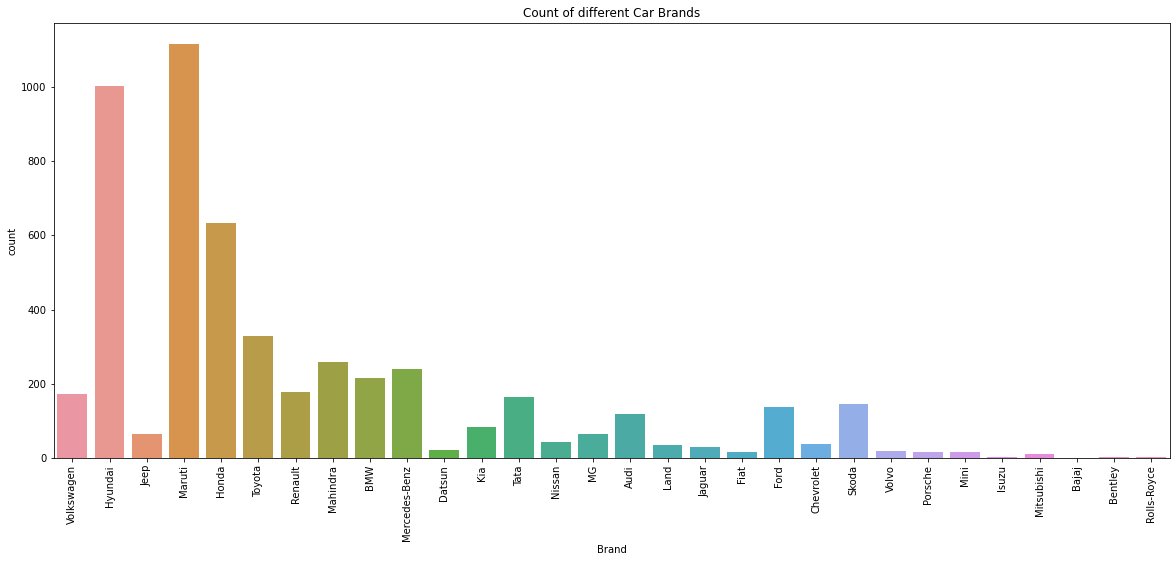

In [59]:
plt.figure(figsize=(20,8))
sns.countplot(df["Brand"])
plt.title("Count of different Car Brands")
plt.xticks(rotation=90)
plt.show()

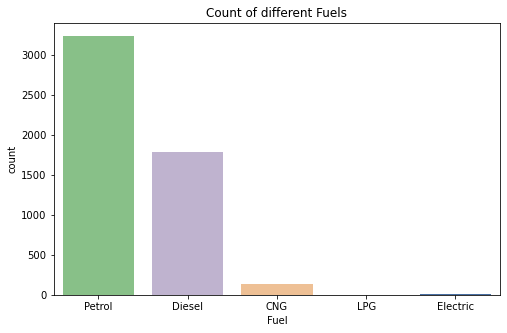

In [60]:
plt.figure(figsize=(8,5))
sns.countplot(df["Fuel"],palette='Accent')
plt.title("Count of different Fuels")
plt.show()

Manual       3213
Automatic    1966
Name: Gear, dtype: int64


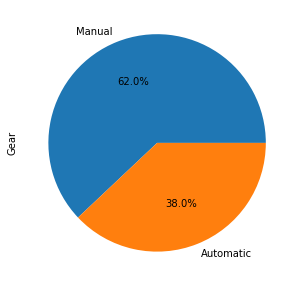

In [61]:
plt.figure(figsize=(10,5))
print(df['Gear'].value_counts())
df['Gear'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

Most of the Used cars are of manual Variant (62% ). The rest are Automatic (38%).

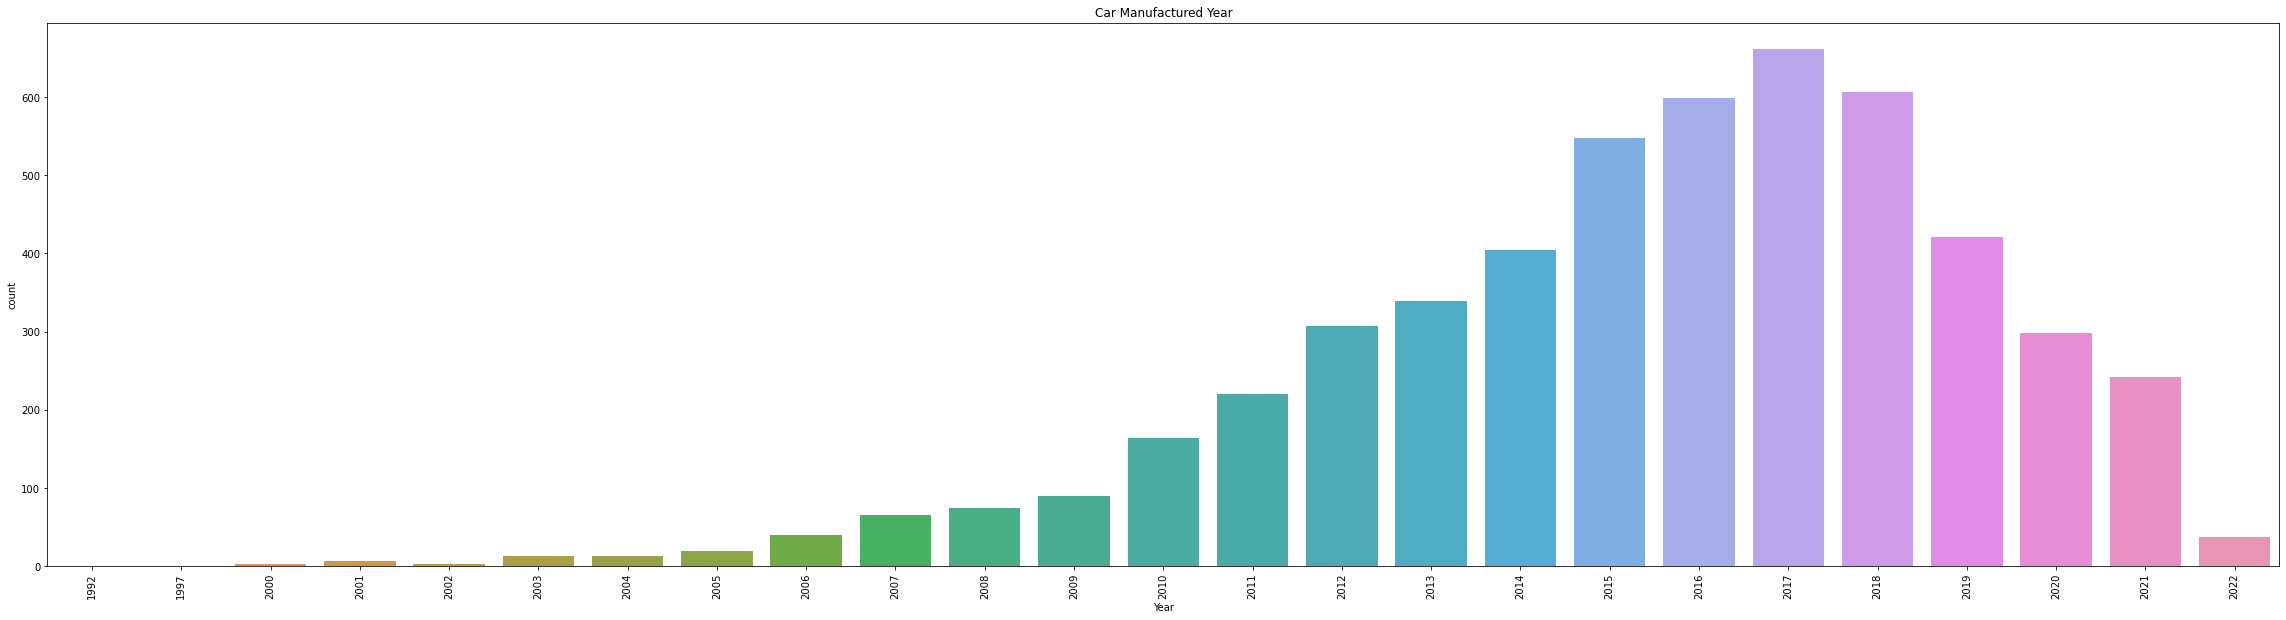

In [62]:
plt.figure(figsize=[40,10])
sns.countplot(df['Year'])
plt.title("Car Manufactured Year")
plt.xticks(rotation=90)
plt.show()

Most of the Used cars are manufactured in 2017 and 2018. Followed by 2016, 2015 & 2019.

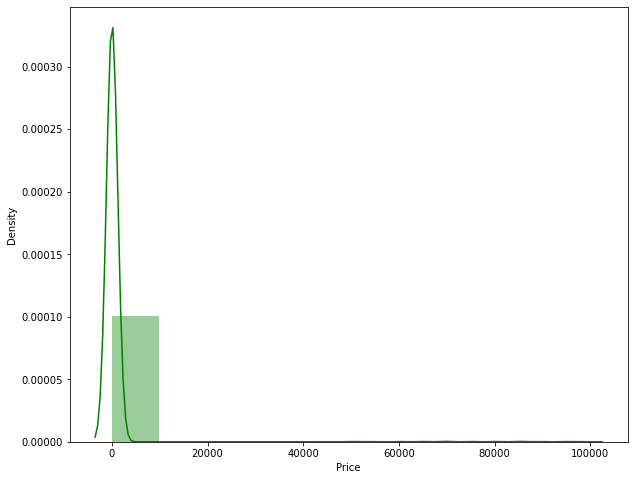

In [64]:
plt.figure(figsize=(10,8))
sns.distplot(df["Price"],bins=10,color='green')
plt.show()

The distribution of Price is normal but it is skewed to the right.

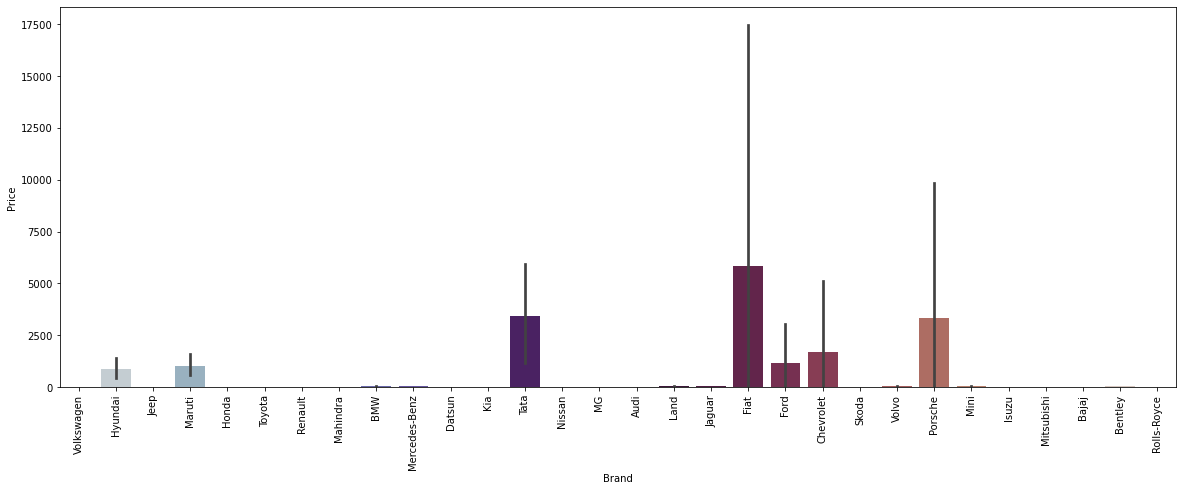

In [65]:
plt.figure(figsize=(20,7))
sns.barplot(x='Brand',y='Price',data=df,palette='twilight')
plt.xticks(rotation=90)
plt.show();

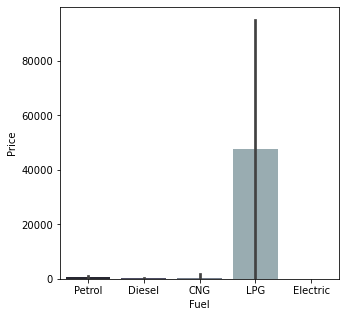

In [66]:
plt.figure(figsize=(5,5))
sns.barplot(x='Fuel',y='Price',data=df,palette='bone')
plt.show();

Most of the cars use petrol as their fuel type, but the highest prices are those which use LPG as their fuel. Next comes petrol CNG follwed by Diesel are the lowest

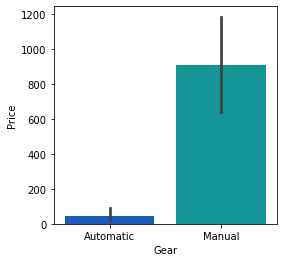

In [67]:
plt.figure(figsize=(4,4))
sns.barplot(x='Gear',y='Price',data=df,palette='winter')
plt.show();

Most of the used cars are Manual, they are also the ones with the highest prices.

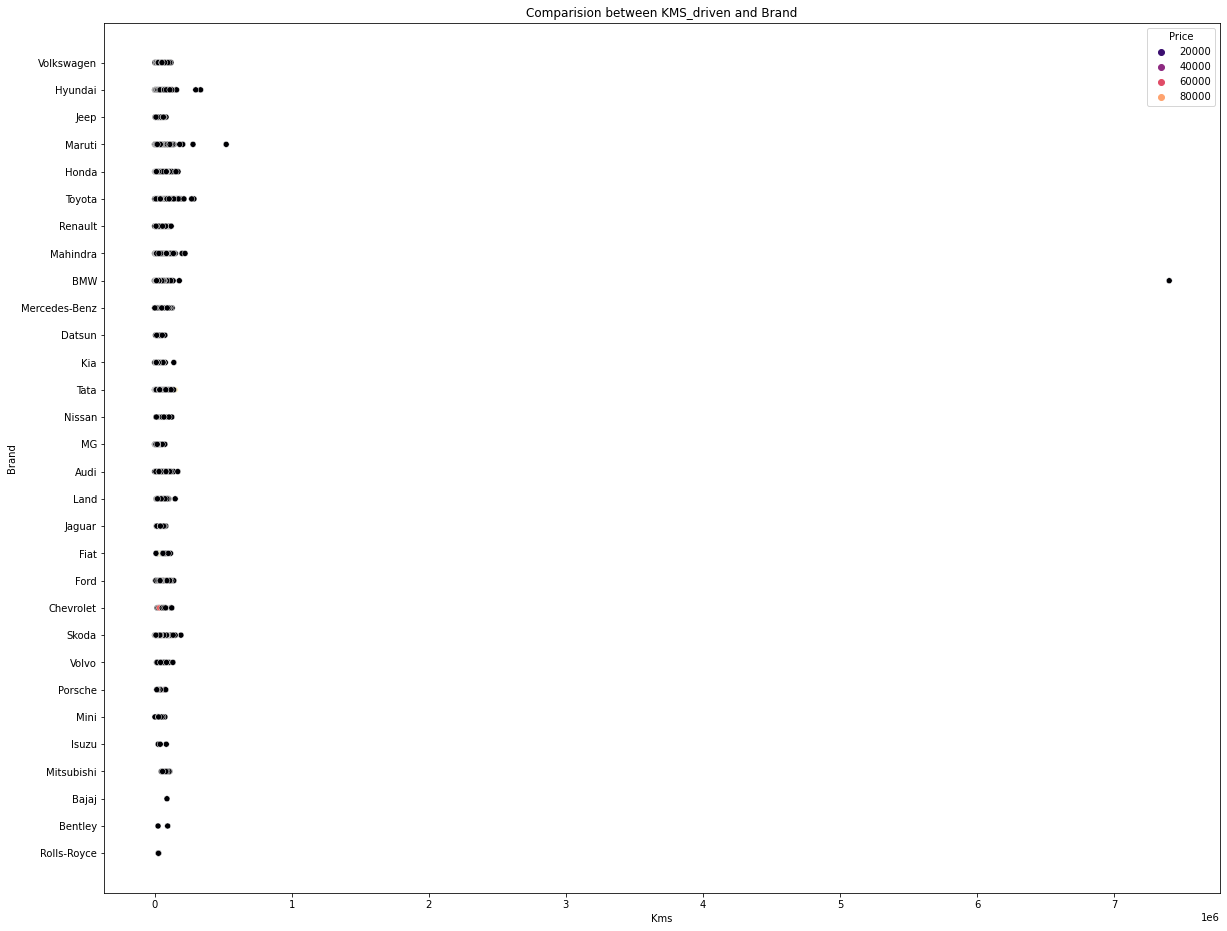

In [68]:
plt.figure(figsize=[20,16])
plt.title('Comparision between KMS_driven and Brand')
sns.scatterplot(df['Kms'],df['Brand'],hue=df['Price'],palette="magma");

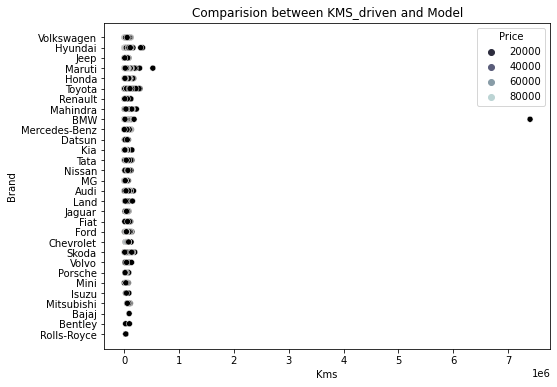

In [69]:
plt.figure(figsize=[8,6])
plt.title('Comparision between KMS_driven and Model')
sns.scatterplot(df['Kms'],df['Brand'],hue=df['Price'],palette="bone");

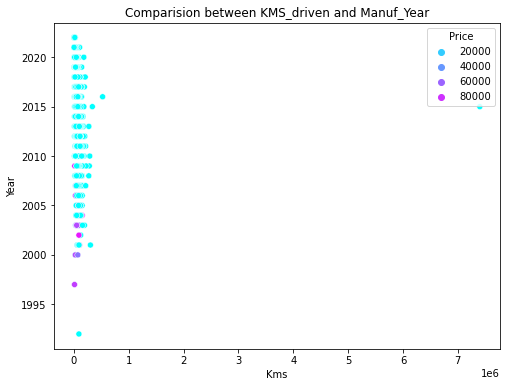

In [70]:
plt.figure(figsize=[8,6])
plt.title('Comparision between KMS_driven and Manuf_Year')
sns.scatterplot(df['Kms'],df['Year'],hue=df['Price'],palette="cool");

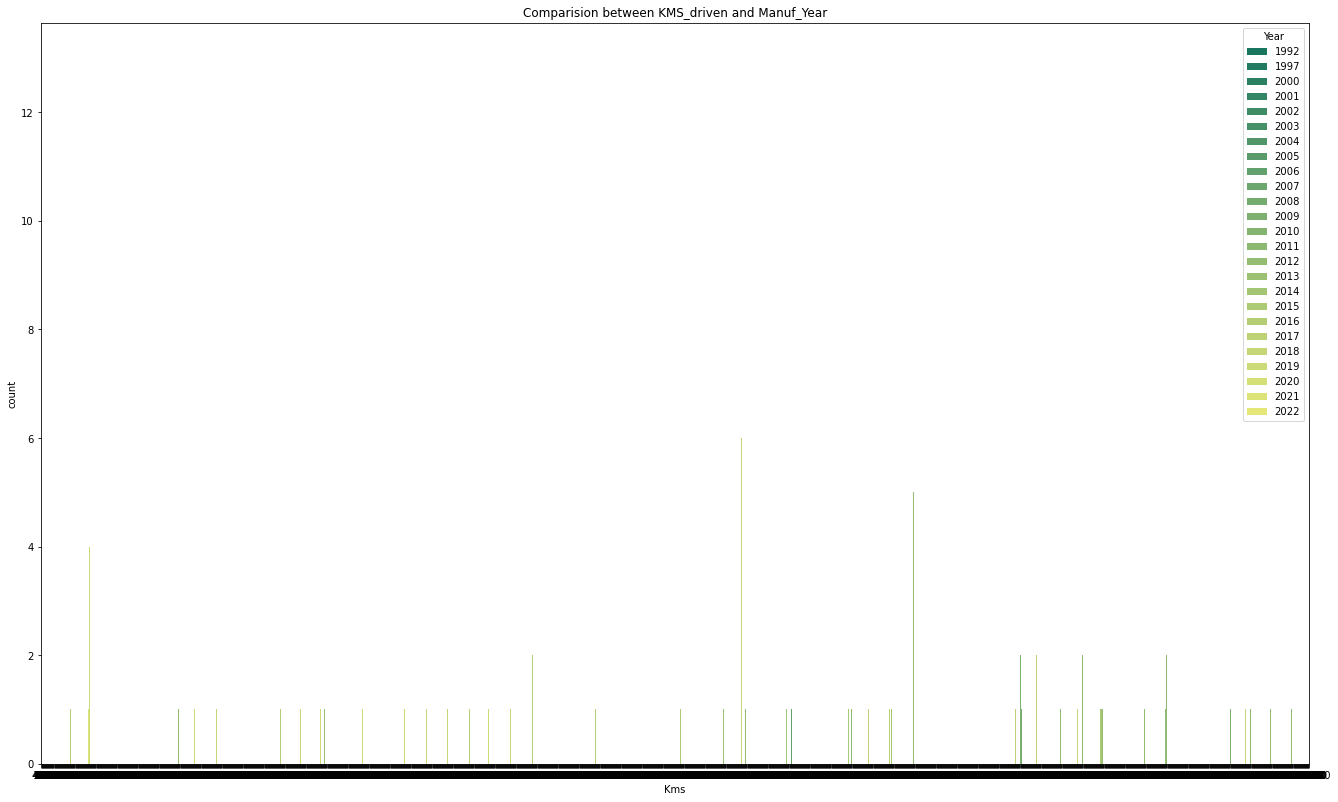

In [71]:
plt.figure(figsize=[50,30])

plt.subplot(2,2,1)
plt.title('Comparision between KMS_driven and Manuf_Year',fontsize=12)
sns.countplot(df['Kms'],hue=df['Year'],palette="summer");

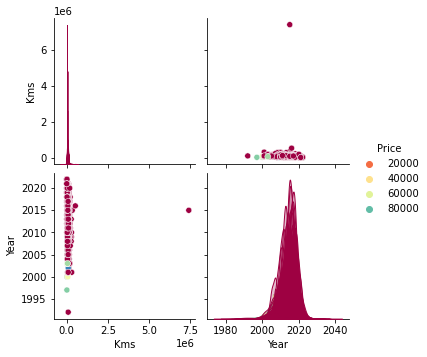

In [72]:
sns.pairplot(df,hue="Price",palette="Spectral")
plt.show()

In [73]:
df.columns

Index(['Fuel', 'Kms', 'Gear', 'Mileage', 'Price', 'Year', 'Brand'], dtype='object')

In [74]:
df.dtypes

Fuel        object
Kms          int64
Gear        object
Mileage     object
Price      float64
Year         int32
Brand       object
dtype: object

In [75]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [76]:
df['Brand'] = le.fit_transform(df['Brand'])
df['Kms'] = le.fit_transform(df['Kms'])
df['Fuel'] = le.fit_transform(df['Fuel'])
df['Gear'] = le.fit_transform(df['Gear'])

In [77]:
df

Fuel   Kms  Gear Mileage  Price  Year  Brand
0        4  1192     0   18.19   7.58  2017     28
1        4  2080     1   17.01   5.88  2015      9
2        4  1384     0   18.19   7.53  2017     28
3        4   804     0      16  16.78  2019     12
4        4  1686     0    18.9   5.63  2016      9
...    ...   ...   ...     ...    ...   ...    ...
5174     4  2455     0   10.54   1.23  2020      1
5175     4   154     0    12.1  61.95  2021     12
5176     4  2173     1    21.1   2.72  2017      9
5177     4  2361     1   19.81   1.80  2011      9
5178     4    13     0       -  79.00  2021     18

[5179 rows x 7 columns]

# Outliers

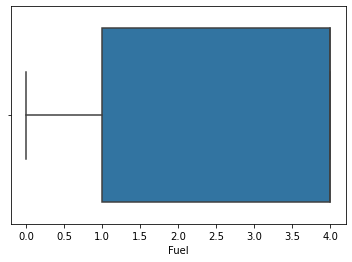

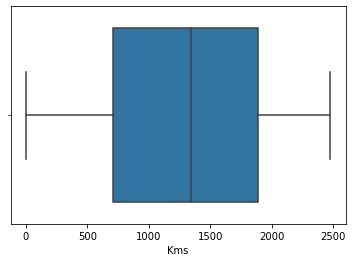

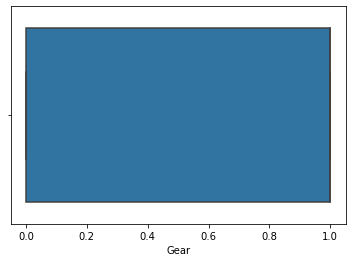

TypeError: Horizontal orientation requires numeric `x` variable.

In [78]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()


We shall remove the outliers present in the dataset using Z-Score Method.

In [80]:
df_outliers=df[["Brand", "Gear", "Year"]]

In [81]:
from scipy.stats import zscore

z=np.abs(zscore(df_outliers))
df_usedcars=df[(z<3).all(axis=1)]
df_usedcars

Fuel   Kms  Gear Mileage  Price  Year  Brand
0        4  1192     0   18.19   7.58  2017     28
1        4  2080     1   17.01   5.88  2015      9
2        4  1384     0   18.19   7.53  2017     28
3        4   804     0      16  16.78  2019     12
4        4  1686     0    18.9   5.63  2016      9
...    ...   ...   ...     ...    ...   ...    ...
5174     4  2455     0   10.54   1.23  2020      1
5175     4   154     0    12.1  61.95  2021     12
5176     4  2173     1    21.1   2.72  2017      9
5177     4  2361     1   19.81   1.80  2011      9
5178     4    13     0       -  79.00  2021     18

[5138 rows x 7 columns]

In [82]:
df_usedcars.shape

(5138, 7)

In [83]:
df.shape

(5179, 7)

In [84]:
Data_loss=((5179-5138)/5179)*100
Data_loss

0.7916586213554739

In [85]:
df_usedcars.skew()

Fuel     -0.556495
Kms      -0.114382
Gear     -0.483076
Price    15.511571
Year     -0.582288
Brand     0.173402
dtype: float64

In [86]:
df_skew=['Fuel','Gear']

In [87]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [88]:
df_usedcars[df_skew] = scaler.fit_transform(df_usedcars[df_skew].values)

In [89]:
df_usedcars[df_skew].skew()

Fuel   -0.527896
Gear   -0.483076
dtype: float64

In [90]:
# Correlation of dataset
df_usedcars.corr()

Fuel       Kms      Gear     Price      Year     Brand
Fuel   1.000000 -0.298826  0.114400  0.032181  0.016224 -0.076683
Kms   -0.298826  1.000000  0.118185  0.032223 -0.607254  0.040020
Gear   0.114400  0.118185  1.000000  0.047096 -0.163512  0.079059
Price  0.032181  0.032223  0.047096  1.000000 -0.164758  0.013843
Year   0.016224 -0.607254 -0.163512 -0.164758  1.000000  0.051491
Brand -0.076683  0.040020  0.079059  0.013843  0.051491  1.000000

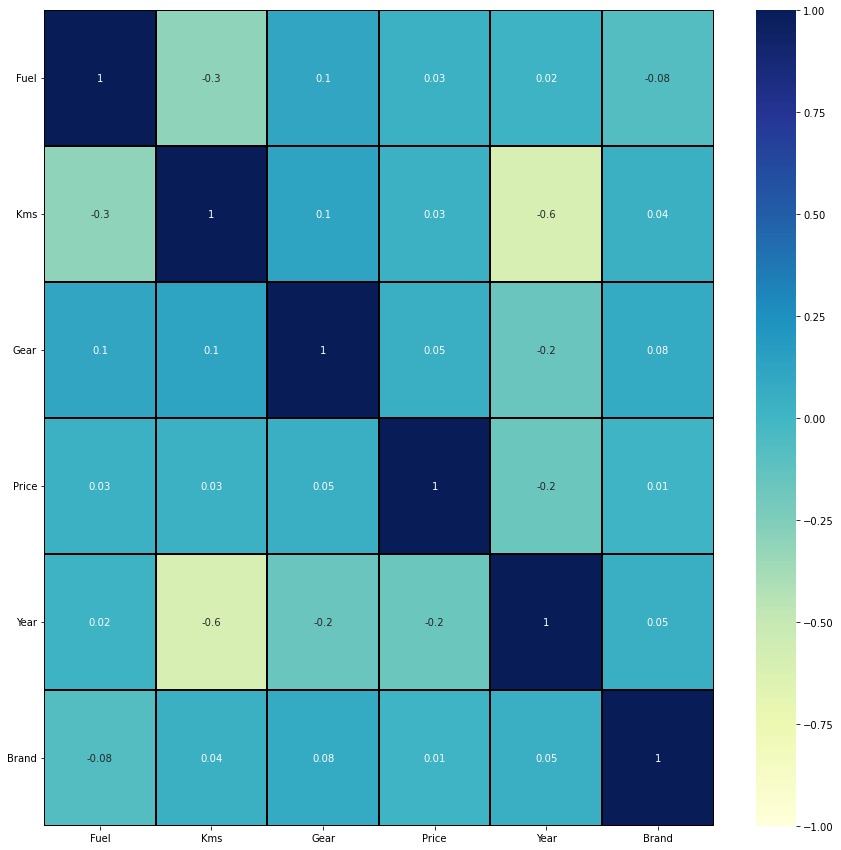

In [91]:
# Visualizing the correlation matrix by plotting heatmap for train dataset.
plt.figure(figsize=(15,15))
sns.heatmap(df_usedcars.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

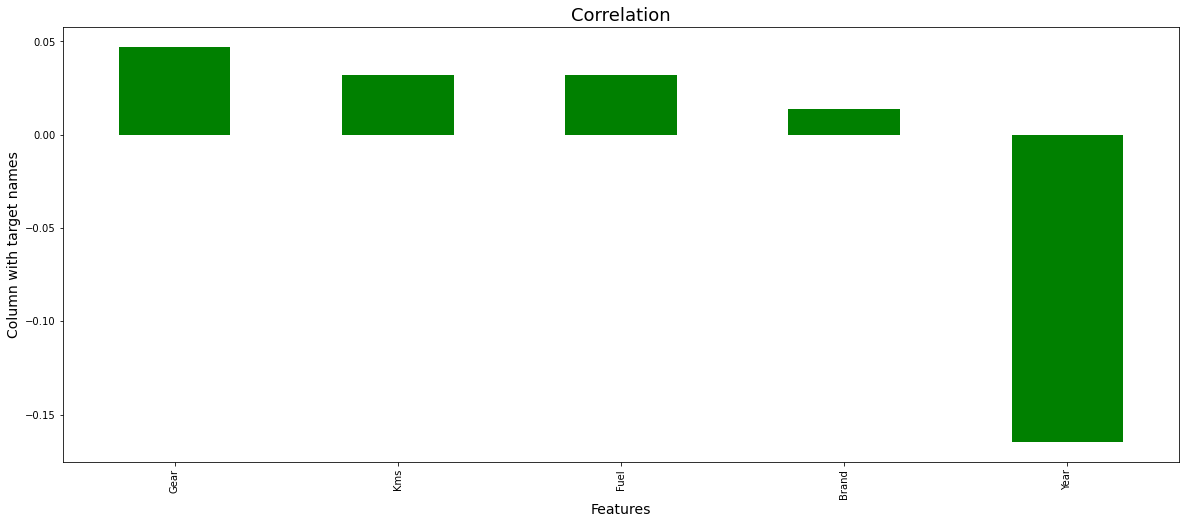

In [92]:
plt.figure(figsize=(20,8))
df_usedcars.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()